# Visually test the content of the dataset

In [48]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

### Choose a dataset index and check that the dataset exists

In [49]:
dataset_idx = 6
dataset_path = Path(f"../data/datasets/dataset_{dataset_idx}.pt")
nans_masks_path = Path(f"../data/nanmasks/nanmasks_{dataset_idx}.pt")

if not nans_masks_path.exists():
    raise FileNotFoundError(f"File {nans_masks_path} does not exist.")
if not dataset_path.exists():
    raise FileNotFoundError(f"File {dataset_path} does not exist.")

### Load the dataset

In [50]:
dataset = th.load(dataset_path)
nans_masks = th.load(nans_masks_path)

dataset_keys = list(dataset.keys())
n_channels = dataset[dataset_keys[0]].shape[1]

### Select a random image and a specific channel to plot and 

### Plot the minimal dataset

Image index: 7, Masked channel: 1


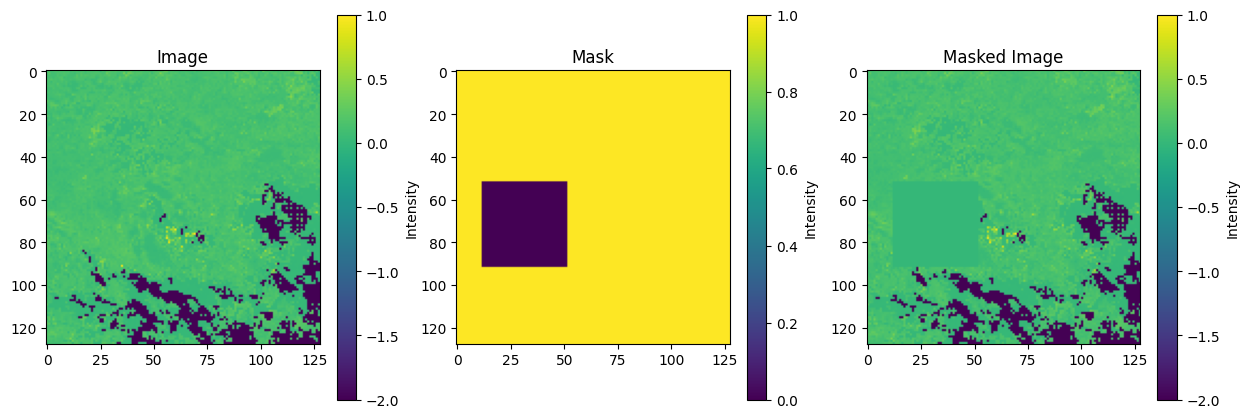

In [58]:
random_idx = np.random.randint(0, dataset[dataset_keys[0]].shape[0])
masked_channel = np.random.randint(0, n_channels)
print(f"Image index: {random_idx}, Masked channel: {masked_channel}")

image = dataset[dataset_keys[0]][random_idx, masked_channel, :, :]
mask = dataset[dataset_keys[1]][random_idx, masked_channel, :, :]
masked_image = image * mask
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image.numpy(), cmap='viridis')
axs[0].set_title("Image")
axs[1].imshow(mask.numpy(), cmap='viridis')
axs[1].set_title("Mask")
axs[2].imshow((image * mask).numpy(), cmap='viridis')
axs[2].set_title("Masked Image")
for ax in axs:
    cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical')
    cbar.ax.set_ylabel('Intensity')

### Plot the nans mask

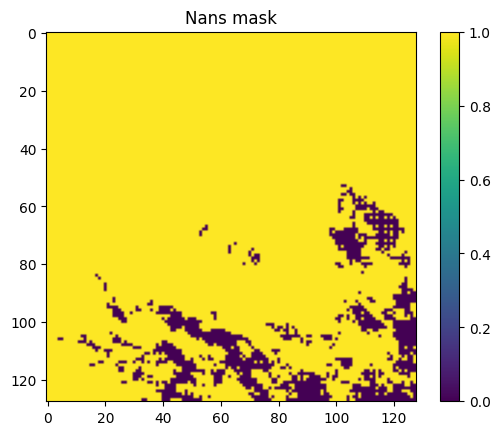

In [52]:
plt.imshow(nans_masks[random_idx, masked_channel, :, :].numpy(), cmap='viridis')
plt.title("Nans mask")
plt.colorbar()